<a href="https://colab.research.google.com/github/pushpendra0907/TaskByObjectWays/blob/main/TaskByObjectWays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyspark py4j

In [ ]:

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkCode').getOrCreate()
df=spark.read.csv("/analytics_input.csv",header='True')
df.printSchema()


In [8]:
df.show(5)

+--------------------+-----------+--------------------+-----------------------+-------------+--------------+-----------------+------------------------------------+------------------+-------------------------+------------------------+-------------------------+
|      DRG Definition|Provider Id|       Provider Name|Provider Street Address|Provider City|Provider State|Provider Zip Code|Hospital Referral Region Description| Total Discharges | Average Covered Charges | Average Total Payments |Average Medicare Payments|
+--------------------+-----------+--------------------+-----------------------+-------------+--------------+-----------------+------------------------------------+------------------+-------------------------+------------------------+-------------------------+
|039 - EXTRACRANIA...|      10001|SOUTHEAST ALABAMA...|   1108 ROSS CLARK C...|       DOTHAN|            AL|            36301|                         AL - Dothan|                91|                $32963.07|            

In [40]:
from pyspark.sql import functions as F
df=df.toDF(*[c.lower() for c in df.columns])
df = df.select([F.col(col).alias(col.replace(' ', '_')) for col in df.columns])
df.show(2)

+--------------------+-----------+--------------------+-----------------------+-------------+--------------+-----------------+------------------------------------+------------------+-------------------------+------------------------+-------------------------+
|      drg_definition|provider_id|       provider_name|provider_street_address|provider_city|provider_state|provider_zip_code|hospital_referral_region_description|_total_discharges_|_average_covered_charges_|_average_total_payments_|average_medicare_payments|
+--------------------+-----------+--------------------+-----------------------+-------------+--------------+-----------------+------------------------------------+------------------+-------------------------+------------------------+-------------------------+
|039 - EXTRACRANIA...|      10001|SOUTHEAST ALABAMA...|   1108 ROSS CLARK C...|       DOTHAN|            AL|            36301|                         AL - Dothan|                91|                $32963.07|            

TypeError: ignored

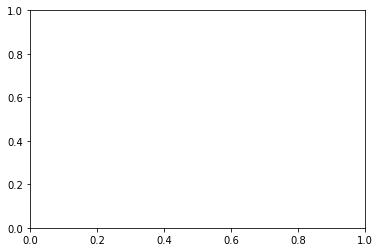

In [55]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F
%matplotlib inline
x= df.select(df.provider_state)
y= df.select(df._average_total_payments_)
plt.bar(x,y,width=[-0.4],align='edge',color=['red','green','yellow'],edgecolor='black',linewidth="2")
plt.xlabel('state')
plt.ylabel('total payment')


In [56]:
df.filter(df.provider_id.isNull()).show()

+--------------+-----------+-------------+-----------------------+-------------+--------------+-----------------+------------------------------------+------------------+-------------------------+------------------------+-------------------------+
|drg_definition|provider_id|provider_name|provider_street_address|provider_city|provider_state|provider_zip_code|hospital_referral_region_description|_total_discharges_|_average_covered_charges_|_average_total_payments_|average_medicare_payments|
+--------------+-----------+-------------+-----------------------+-------------+--------------+-----------------+------------------------------------+------------------+-------------------------+------------------------+-------------------------+
+--------------+-----------+-------------+-----------------------+-------------+--------------+-----------------+------------------------------------+------------------+-------------------------+------------------------+-------------------------+



In [18]:
import pyspark
from pyspark.sql import SparkSession 
dataRDD = spark.sparkContext.textFile("/analytics_input.csv",100)
header = dataRDD.first()
mData = dataRDD.filter(lambda x : x!= header).map(lambda x : x.split(","))
aIdf = mData.map(lambda x : (x[0],int(x[1]),x[2],x[3],x[4],x[5],int(x[6]),x[7],float(x[8][1:]),float(x[9][1:]),float(x[10][1:]),float(x[11][1:]))).toDF(['DRG Definition', 'Provider Id', 'Provider Name', 'Provider Street Address', 'Provider City', 'Provider State', 'Provider Zip Code', 'Hospital Referral Region Description', ' Total Discharges ', ' Average Covered Charges ', ' Average Total Payments ', 'Average Medicare Payments'])
aIdf.show(5)

+--------------------+-----------+--------------------+-----------------------+-------------+--------------+-----------------+------------------------------------+------------------+-------------------------+------------------------+-------------------------+
|      DRG Definition|Provider Id|       Provider Name|Provider Street Address|Provider City|Provider State|Provider Zip Code|Hospital Referral Region Description| Total Discharges | Average Covered Charges | Average Total Payments |Average Medicare Payments|
+--------------------+-----------+--------------------+-----------------------+-------------+--------------+-----------------+------------------------------------+------------------+-------------------------+------------------------+-------------------------+
|039 - EXTRACRANIA...|      10001|SOUTHEAST ALABAMA...|   1108 ROSS CLARK C...|       DOTHAN|            AL|            36301|                         AL - Dothan|               1.0|                 32963.07|            

In [16]:
df1=df.write.partitionBy("Provider State").format("parquet").save("/state_partition.parquet")